# U1B model: neutrino masses

The idea is to check the neutrino mases to one loop.
Leshouches dictionary, SPHENO_4.0.3, micromegas_5.0.4

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time
import sys

%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
import pyslha
import pyU1B_LesHouches_generator

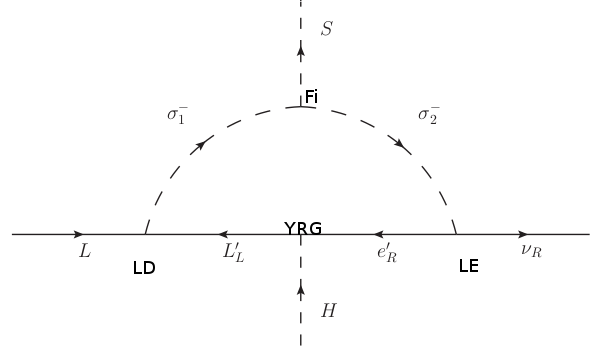

In [3]:
from IPython.display import Image
Image("zee-couplings.png")

run diccionary

In [35]:
# Tiempo inicial
t1=time.time() 

x=[]

Num = 1

for i in range (0,Num):
    
    xdict = pyU1B_LesHouches_generator.buildSLHAinFile()

    L2 = -7.23E-2
    YA1 = 0.5
    YC1 = 1.0 #control the Fvv mass
    vx = np.random.uniform(1500,6000)
    YRG = 2.1E-2
    
    Fi11 = 0.112
    Fi12 = 0.021
    Fi21 = 0.020
    Fi22 = 0.011
    
    LD11 = 1.1E-1
    LD12 = 1.2E-2
    LD13 = 1.2E-2
    LD21 = 1.1E-2
    LD22 = 1.3E-2
    LD23 = 1.21E-2
    
    LE11 = 1.11E-2
    LE12 = 1.12E-2
    LE21 = 1.13E-2
    LE22 = 1.14E-2
    
    #Modify one parameter
    xdict.blocks['MINPAR'].entries[2]='%.6E    # Lambda2INPUT'%L2
    xdict.blocks['MINPAR'].entries[7]='%.6E    # YA1INPUT'%YA1
    xdict.blocks['MINPAR'].entries[11]='%.6E    # YC1INPUT'%YC1
    xdict.blocks['MINPAR'].entries[13]='%.6E    # YRGINPUT'%YRG
    xdict.blocks['MINPAR'].entries[15]='%.6E    # vXInput'%vx
    
    xdict.blocks['FIIN'].entries[1,1]='%.6E    # Fi(1,1)'%Fi11
    xdict.blocks['FIIN'].entries[1,2]='%.6E    # Fi(1,2)'%Fi12
    xdict.blocks['FIIN'].entries[2,1]='%.6E    # Fi(2,1)'%Fi21
    xdict.blocks['FIIN'].entries[2,2]='%.6E    # Fi(2,2)'%Fi22
    
    xdict.blocks['LDIN'].entries[1,1]='%.6E    # LD(1,1)'%LD11
    xdict.blocks['LDIN'].entries[1,2]='%.6E    # LD(1,2)'%LD12
    xdict.blocks['LDIN'].entries[1,3]='%.6E    # LD(1,3)'%LD13
    xdict.blocks['LDIN'].entries[2,1]='%.6E    # LD(2,1)'%LD21
    xdict.blocks['LDIN'].entries[2,2]='%.6E    # LD(2,2)'%LD22
    xdict.blocks['LDIN'].entries[2,3]='%.6E    # LD(2,3)'%LD23
    
    xdict.blocks['LEIN'].entries[1,1]='%.6E    # LE(1,1)'%LE11
    xdict.blocks['LEIN'].entries[1,2]='%.6E    # LE(1,2)'%LE12
    xdict.blocks['LEIN'].entries[2,1]='%.6E    # LE(2,1)'%LE21
    xdict.blocks['LEIN'].entries[2,2]='%.6E    # LE(2,2)'%LE22
                
    pyslha.writeSLHAFile('LesHouches.in.U1B_low',xdict) 

    #run SPheno
    spheno = subprocess.getoutput('~/Work/SPheno-4.0.3/bin/SPhenoU1B LesHouches.in.U1B_low')    
    so = subprocess.getoutput('cat SPheno.spc.U1B')
    
    #capturo algo de spheno
    MZp = eval(so.split('# VWm')[1].split()[1])
    mnu1 = np.abs(eval(so.split('# Fe_3')[1].split()[1]))
    mnu2 = np.abs(eval(so.split('# Fe_3')[1].split()[5]))
    mnu3 = np.abs(eval(so.split('# Fe_3')[1].split()[13]))
    
    ZP22 = eval(so.split('# ZP(2,1)')[1].split()[2])
    ZP23 = eval(so.split('# ZP(2,1)')[1].split()[7])
    ZP24 = eval(so.split('# ZP(2,1)')[1].split()[12])
    ZP25 = eval(so.split('# ZP(2,1)')[1].split()[17])

    ZP32 = eval(so.split('# ZP(2,1)')[1].split()[27])
    ZP33 = eval(so.split('# ZP(2,1)')[1].split()[32])
    ZP34 = eval(so.split('# ZP(2,1)')[1].split()[37])
    ZP35 = eval(so.split('# ZP(2,1)')[1].split()[42])

    ZP42 = eval(so.split('# ZP(2,1)')[1].split()[52])
    ZP43 = eval(so.split('# ZP(2,1)')[1].split()[57])
    ZP44 = eval(so.split('# ZP(2,1)')[1].split()[62])
    ZP45 = eval(so.split('# ZP(2,1)')[1].split()[67])

    ZP52 = eval(so.split('# ZP(2,1)')[1].split()[77])
    ZP53 = eval(so.split('# ZP(2,1)')[1].split()[82])
    ZP54 = eval(so.split('# ZP(2,1)')[1].split()[87])
    ZP55 = eval(so.split('# ZP(2,1)')[1].split()[92])
     
    x.append([L2,YA1,YC1,vx,YRG,Fi11,Fi12,Fi21,Fi22,LD11,LD12,LD13,LD21,LD22,LD23,LE11,LE12,LE21,LE22,MZp,\
              mnu1,mnu2,mnu3,ZP22,ZP23,ZP24,ZP25,ZP32,ZP33,ZP34,ZP35,ZP42,ZP43,ZP44,ZP45,ZP52,ZP53,ZP54,ZP55])

x=np.asarray(x)
xd=pd.DataFrame(x,columns=['L2','YA1','YC1','vx','YRG','Fi11','Fi12','Fi21','Fi22','LD11','LD12','LD13',\
                           'LD21','LD22','LD23','LE11','LE12','LE21','LE22','MZp','mnu1','mnu2','mnu3',\
                           'ZP22','ZP23','ZP24','ZP25','ZP32','ZP33','ZP34','ZP35','ZP42','ZP43','ZP44',\
                           'ZP45','ZP52','ZP53','ZP54','ZP55'])  

t2=time.time() 
print ("The program spent", t2-t1, "s running",Num,"times")   

The program spent 1.3088510036468506 s running 1 times


In [36]:
xd

,L2,YA1,YC1,vx,YRG,Fi11,Fi12,Fi21,Fi22,LD11,...,ZP34,ZP35,ZP42,ZP43,ZP44,ZP45,ZP52,ZP53,ZP54,ZP55
0,-0.0723,0.5,1.0,2618.94191,0.021,0.112,0.021,0.02,0.011,0.11,...,2.058025e-07,1.028882e-08,0.000001,2.057677e-07,1.0,-3.331306e-08,1.946411e-08,1.028818e-08,3.331303e-08,1.0


In [31]:
so.splitlines()

['# SUSY Les Houches Accord 2 - U1B Spectrum + Decays + Flavor Observables',
 '# SPheno module generated by SARAH',
 '# ----------------------------------------------------------------------',
 '# SPheno v4.0.3  ',
 '#   W. Porod, Comput. Phys. Commun. 153 (2003) 275-315, hep-ph/0301101',
 '#   W. Porod, F.Staub, Comput.Phys.Commun.183 (2012) 2458-2469, arXiv:1104.1573',
 '# SARAH: 4.12.3  ',
 '#   F. Staub; arXiv:0806.0538 (online manual)',
 '#   F. Staub; Comput. Phys. Commun. 181 (2010) 1077-1086; arXiv:0909.2863',
 '#   F. Staub; Comput. Phys. Commun. 182 (2011)  808-833; arXiv:1002.0840',
 '#   F. Staub; Comput. Phys. Commun. 184 (2013)  1792-1809; arXiv:1207.0906',
 '#   F. Staub; Comput. Phys. Commun. 185 (2014)  1773-1790; arXiv:1309.7223 ',
 '# Including the calculation of flavor observables based on the FlavorKit ',
 '#   W. Porod, F. Staub, A. Vicente; Eur.Phys.J. C74 (2014) 8, 2992; arXiv:1405.1434 ',
 '# Two-loop masss corrections to Higgs fields based on ',
 '#   M. D. Go

In [34]:
print(ZP52,ZP53,ZP54,ZP55)

2.57314674e-08 1.36009266e-08 3.33130345e-08 1.0


In [33]:
ZP22 = eval(so.split('# ZP(2,1)')[1].split()[2])
ZP23 = eval(so.split('# ZP(2,1)')[1].split()[7])
ZP24 = eval(so.split('# ZP(2,1)')[1].split()[12])
ZP25 = eval(so.split('# ZP(2,1)')[1].split()[17])

ZP32 = eval(so.split('# ZP(2,1)')[1].split()[27])
ZP33 = eval(so.split('# ZP(2,1)')[1].split()[32])
ZP34 = eval(so.split('# ZP(2,1)')[1].split()[37])
ZP35 = eval(so.split('# ZP(2,1)')[1].split()[42])

ZP42 = eval(so.split('# ZP(2,1)')[1].split()[52])
ZP43 = eval(so.split('# ZP(2,1)')[1].split()[57])
ZP44 = eval(so.split('# ZP(2,1)')[1].split()[62])
ZP45 = eval(so.split('# ZP(2,1)')[1].split()[67])

ZP52 = eval(so.split('# ZP(2,1)')[1].split()[77])
ZP53 = eval(so.split('# ZP(2,1)')[1].split()[82])
ZP54 = eval(so.split('# ZP(2,1)')[1].split()[87])
ZP55 = eval(so.split('# ZP(2,1)')[1].split()[92])

In [30]:
print(ZP22,ZP23,ZP24,ZP25)
print(ZP32,ZP33,ZP34,ZP35)
print(ZP42,ZP43,ZP44,ZP45)
print(ZP52,ZP53,ZP54,ZP55)

-0.999999999 3.33119327e-05 1.38481249e-06 2.57309682e-08
-3.33119324e-05 -0.999999999 2.72070001e-07 1.36017747e-08
1.38482155e-06 2.7202387e-07 1.0 -3.33130739e-08


In [8]:
SPheno_output.splitlines()

['# SUSY Les Houches Accord 2 - U1B Spectrum + Decays + Flavor Observables',
 '# SPheno module generated by SARAH',
 '# ----------------------------------------------------------------------',
 '# SPheno v4.0.3  ',
 '#   W. Porod, Comput. Phys. Commun. 153 (2003) 275-315, hep-ph/0301101',
 '#   W. Porod, F.Staub, Comput.Phys.Commun.183 (2012) 2458-2469, arXiv:1104.1573',
 '# SARAH: 4.12.3  ',
 '#   F. Staub; arXiv:0806.0538 (online manual)',
 '#   F. Staub; Comput. Phys. Commun. 181 (2010) 1077-1086; arXiv:0909.2863',
 '#   F. Staub; Comput. Phys. Commun. 182 (2011)  808-833; arXiv:1002.0840',
 '#   F. Staub; Comput. Phys. Commun. 184 (2013)  1792-1809; arXiv:1207.0906',
 '#   F. Staub; Comput. Phys. Commun. 185 (2014)  1773-1790; arXiv:1309.7223 ',
 '# Including the calculation of flavor observables based on the FlavorKit ',
 '#   W. Porod, F. Staub, A. Vicente; Eur.Phys.J. C74 (2014) 8, 2992; arXiv:1405.1434 ',
 '# Two-loop masss corrections to Higgs fields based on ',
 '#   M. D. Go

## Z' mass

\begin{equation}
M_{Z^{'}} =Q_sg^{'} v_S =  5 g^{'} v_S
\end{equation}

In [9]:
Qs = 5.
xd['MZpt'] = Qs*0.5*xd.vx

In [10]:
xd.MZpt

0    10919.782272
1    12205.354276
2    13576.733808
3    11795.838190
4    14271.221087
Name: MZpt, dtype: float64

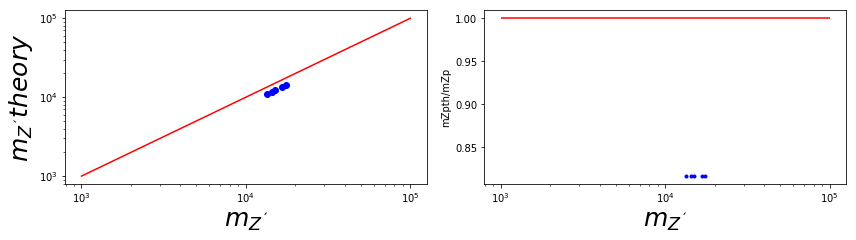

In [11]:
plt.figure(figsize=(12,6))

plt.subplot(221)
plt.loglog(xd.MZp, xd.MZpt,'bo')

a = np.linspace(1e3,1e5,10)
plt.plot(a,a,'r-')
plt.xlabel(r'$m_{Z^´}$',size=25)
plt.ylabel(r'$m_{Z^´} theory$',size=25)

plt.subplot(222)
plt.hlines(1,1e3,1e5,'r')
plt.semilogx(xd.MZp, xd.MZpt/xd.MZp,'b.')
plt.ylabel('mZpth/mZp')
plt.xlabel(r'$m_{Z^´}$',size=25)

plt.tight_layout()
plt.show()